In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [ ]:
df = pd.read_csv("../input/googleplaystore.csv")
df.head()

In [ ]:
features = ['Category','Rating','Reviews','Size','Type','Price','Content Rating']
y = ['Installs']

dropping a row with app name 'Life Made WI-Fi Touchscreen Photo Frame' as it has shifted data:

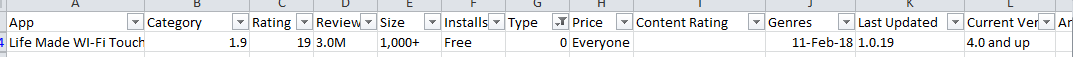

In [ ]:
print(df.columns)
df = df.set_index("App")
print(df.columns)
df = df.drop("Life Made WI-Fi Touchscreen Photo Frame")
df = df.reset_index()
print(df.columns)
#df[df['App'] == 'Life Made WI-Fi Touchscreen Photo Frame']

Now, we impute the median rating for all the NaN values in the column Rating
1.Remove NANs from type and other features.
2.write a function and change the value of type (free=0 and paid = 1)
3.plot individual graphs

In [ ]:
df['Rating'].fillna(df.median()['Rating'],inplace=True)

Function for converting size into a uniform unit(M).
Varies with device => -1

In [ ]:
#print(df['Size'])

def size_convert(d):
    s=d[4]
    if s[len(s)-1] == "M":
        return float(s[:len(s)-1])
    elif s[len(s)-1] == "k" or s[len(s)-1] == "K":
        return (float(s[0:len(s)-1])/1000)
    else:
        return -1

In [ ]:
df['Size'] = df.apply(size_convert, axis=1)

In [ ]:
def clean_Installs(b):
    a=b[5]
    return(a.replace("+","").replace(",",""))
df['Installs'] = df.apply(clean_Installs, axis=1)

In [ ]:
df.head(20)

In [ ]:
def clean_Price(b):
    a=b[7]
    return(a.replace("$",""))
df['Price'] = df.apply(clean_Price, axis=1)

In [ ]:
df.Reviews = df.Reviews.apply(int)
df.Installs = df.Installs.apply(int)
df.Price = df.Price.apply(float)

Making the single record with Type as NaN 'Free'

In [ ]:
fil1 = df.Type.isnull()
fil2 = df.Price == 0
df['Type'].fillna("Free",inplace=True)

Making dummies for the types: Free and Paid

In [ ]:
#dummy = pd.get_dummies(df['Type'])
#df = pd.concat([df,dummy],axis = 1)
#df.head()

In [ ]:
 def make_others(d):
        a = d[1]
        k=df.Category.unique()
        k=k.tolist()
        k.remove('SPORTS')
        k.remove('COMMUNICATION')
        k.remove('ENTERTAINMENT')
        k.remove('HEALTH_AND_FITNESS')
        k.remove('GAME')
        k.remove('FAMILY')
        k.remove('SOCIAL')
        k.remove('PHOTOGRAPHY')
        k.remove('TRAVEL_AND_LOCAL')
        k.remove('TOOLS')
        k.remove('PRODUCTIVITY')
        k.remove('VIDEO_PLAYERS')
        k.remove('NEWS_AND_MAGAZINES')
        k.remove('LIFESTYLE')
        k.remove('PERSONALIZATION')
        k.remove('LIBRARIES_AND_DEMO')
        k.remove('SHOPPING')
        if a in k:
            return "OTHERS"
        else:
            return a

In [ ]:
df['Category'] = df.apply(make_others, axis=1)

In [ ]:
df_cat = df.groupby(df['Category']).agg({'Installs':np.sum}).reset_index()
plt.bar(df_cat.Category,df_cat.Installs)
plt.grid()
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Installs(*10^10)')
plt.title('Category graph')
plt.show()

In [ ]:
df_rat = df.groupby(df['Rating']).agg({'Installs':np.average}).reset_index()
plt.plot(df_rat.Rating,df_rat.Installs,marker='o')
plt.grid()
#plt.xticks(rotation=90)
plt.xlabel('Rating')
plt.ylabel('Installs(*10^10)')
plt.title('Rating graph')
plt.show()

In [ ]:
print(df.Reviews.max(),df.Reviews.min())
import numpy as np

custom_bucket_array = np.arange(0,78158306,10000000)
df["Reviews"] = pd.cut(df["Reviews"],custom_bucket_array)

fin1 = df.groupby(df.Reviews).agg({'Installs':np.average}).reset_index()
#print(fin1)
categories = fin1['Reviews'].cat.categories
ind = np.array([x for x, _ in enumerate(categories)])
width = 0.15 

In [ ]:
plt.bar(ind,fin1["Installs"],width, label='Installs')
plt.xticks(ind, categories)
plt.xticks(rotation = 90)
plt.xlabel('Rating')
plt.ylabel('Installs(*10^10)')
plt.title('Rating graph')
plt.show()

In [ ]:
from scipy import stats
df_1 = df[df['Size'] != -1]
df_size = df_1.groupby(df_1['Size']).agg({'Installs':np.sum}).reset_index()
plt.bar(df_size.Size,df_size.Installs)
plt.grid()
#plt.xticks(rotation=90)
plt.xlabel('Size')
plt.ylabel('Installs(*10^9)')
plt.title('Size graph')
plt.show()

In [ ]:
df_type = df.groupby(df['Type']).agg({'Installs':np.average}).reset_index()
plt.bar(df_type.Type,df_type.Installs)
plt.grid()
#plt.xticks(rotation=90)
plt.xlabel('Type')
plt.ylabel('Installs(*10^9)')
plt.title('Type graph')
plt.show()

In [ ]:
plt.scatter(df.Price,df.Installs)
plt.grid()
#plt.xticks(rotation=90)
plt.xlabel('Price')
plt.ylabel('Installs(*10^9)')
plt.title('Price graph')
plt.show()

In [ ]:
df = df[df['Price']<290]

In [ ]:
df_2 = df[df['Price']!=0]
df_type = df_2.groupby(df_2['Price']).agg({'Installs':np.sum}).reset_index()
plt.scatter(df_type.Price,df_type.Installs)
plt.grid()
#plt.xticks(rotation=90)
plt.xlabel('Price')
plt.ylabel('Installs(*10^7)')
plt.title('Price graph')
plt.show()

In [ ]:
df_cnt = df.groupby(df['Content Rating']).agg({'Installs':np.average}).reset_index()
plt.bar(df_cnt['Content Rating'],df_cnt.Installs)
plt.grid()
#plt.xticks(rotation=90)
plt.xlabel('Content Rating')
plt.ylabel('Installs(*10^11)')
plt.xticks(rotation=90)
plt.title('Content Rating graph')
plt.show()